In [1]:
import os
import cv2
import numpy as np

For each dir in the train dir  
For each file in the dir  
Grayscale the image, flatten the image into a 1D array, and make the name of the dir the label

In [16]:
def load_images_from_folder(folder):
    names_of_file = []
    images = []
    labels = []
    for dir_name in os.listdir(folder):
        dir_path = os.path.join(folder, dir_name)
        if os.path.isdir(dir_path):
            for filename in os.listdir(dir_path):
                img_path = os.path.join(dir_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img_flattened = img.flatten()
                    images.append(img_flattened)
                    labels.append(dir_name)
                    names_of_file.append(filename)
    return np.array(names_of_file), np.array(images), np.array(labels)

In [27]:
# Define test_imag function to test on "test_black_bishop.jpg"
def test_img(img_path, label):
    images = []
    labels = []
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    height, width = img.shape[:2]
    if img is not None:
        img_flattened = img.flatten()
        images.append(img_flattened)
        labels.append(label)
    return np.array(images), np.array(labels), height, width

In [29]:
# use function and explore a bit
test_image_np_array, test_label, h, w = test_img("test_black_bishop.jpg", "bb")

print(test_image_np_array.shape)
print(test_image_np_array.dtype)
print(h, w)

(1, 51529)
uint8
227 227


In [25]:
from matplotlib import pyplot as plt

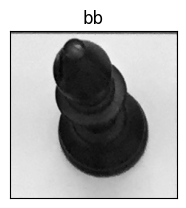

In [30]:
# testing on the test image

def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(test_image_np_array, test_label, h, w, 1, 1) # defaults to showing a 3 by 6 subset of the faces

In [ ]:
# a helper plotting function
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, names[y], h, w) # defaults to showing a 3 by 6 subset of the faces

In [20]:
train_folder = "Chess ID Public Data\output_train"
test_folder = "Chess ID Public Data\output_test"

np_name_train, np_uint8_image_train, np_label_train = load_images_from_folder(train_folder)
np_name_test, np_uint8_image_test, np_label_test = load_images_from_folder(test_folder)

In [23]:
print(np_uint8_image_train.shape)
print(np_label_train)

(10360, 51529)
['bb' 'bb' 'bb' ... 'wr' 'wr' 'wr']


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

In [38]:
# 300 to keep it simple and like on ipynb
n_components = 300

pca = PCA(n_components=n_components)
pca.fit(np_uint8_image_train.copy())
eigenpieces = pca.components_.reshape((n_components, h, w))

In [ ]:
pho